In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_lifestyle_dataset.csv")

In [3]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [5]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [10]:
df[df["Study_Hours_Per_Day"] > 8 ]["Stress_Level"].unique()

array(['High'], dtype=object)

In [9]:
df[df["Study_Hours_Per_Day"] < 8 ]["Stress_Level"].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [10]:
x = df.drop(["Stress_Level"],axis=1)
y = df["Stress_Level"]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# k nearest neighbour classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[209  16  96]
 [ 46  15  26]
 [115  10  67]]
0.485
              precision    recall  f1-score   support

        High       0.56      0.65      0.60       321
         Low       0.37      0.17      0.23        87
    Moderate       0.35      0.35      0.35       192

    accuracy                           0.48       600
   macro avg       0.43      0.39      0.40       600
weighted avg       0.47      0.48      0.47       600



# Decision tree

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [20]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.6, 0.875, 'x[1] <= 8.05\ngini = 0.601\nsamples = 1400\nvalue = [708, 202, 490]'),
 Text(0.4, 0.625, 'x[3] <= 5.95\ngini = 0.593\nsamples = 884\nvalue = [192, 202, 490]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 192\nvalue = [192, 0, 0]'),
 Text(0.6, 0.375, 'x[1] <= 5.95\ngini = 0.413\nsamples = 692\nvalue = [0, 202, 490]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 202\nvalue = [0, 202, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 490\nvalue = [0, 0, 490]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 516\nvalue = [516, 0, 0]')]

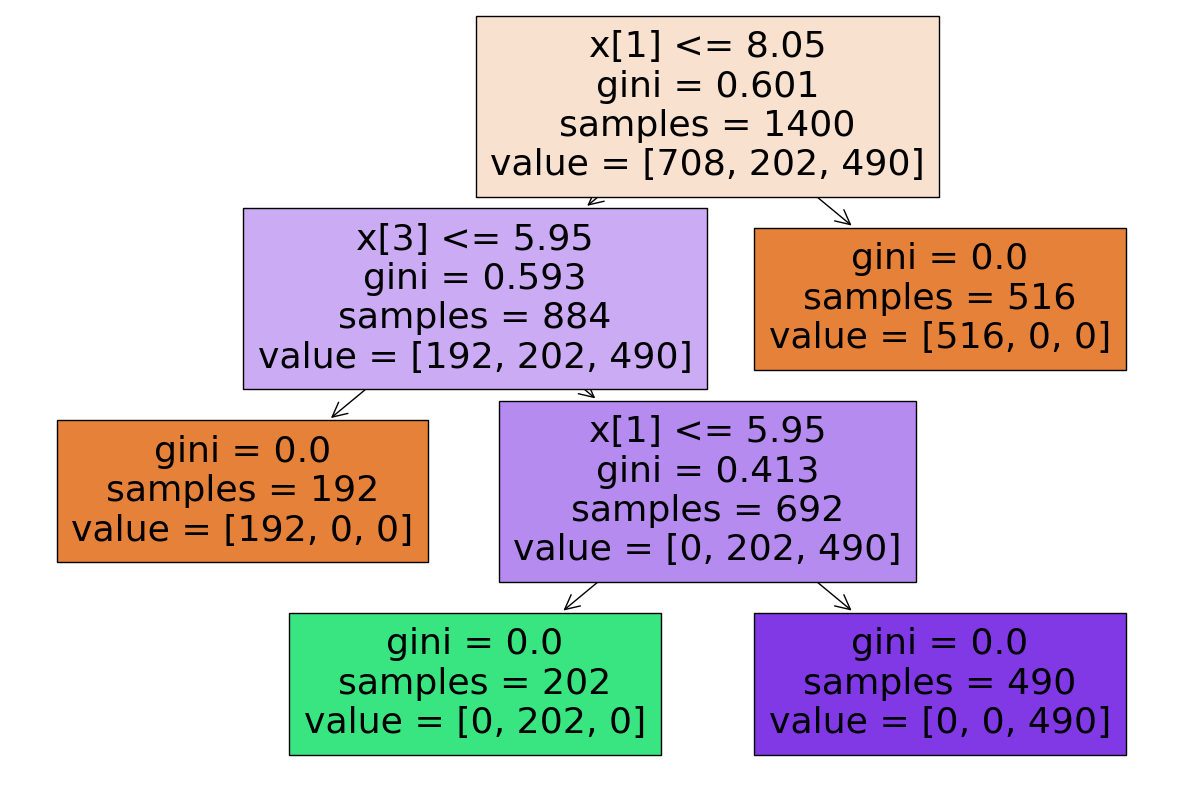

In [21]:
# To visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [22]:
treeclassifier = DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'x[1] <= 8.05\ngini = 0.601\nsamples = 1400\nvalue = [708, 202, 490]'),
 Text(0.4, 0.5, 'x[3] <= 5.95\ngini = 0.593\nsamples = 884\nvalue = [192, 202, 490]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 192\nvalue = [192, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.413\nsamples = 692\nvalue = [0, 202, 490]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 516\nvalue = [516, 0, 0]')]

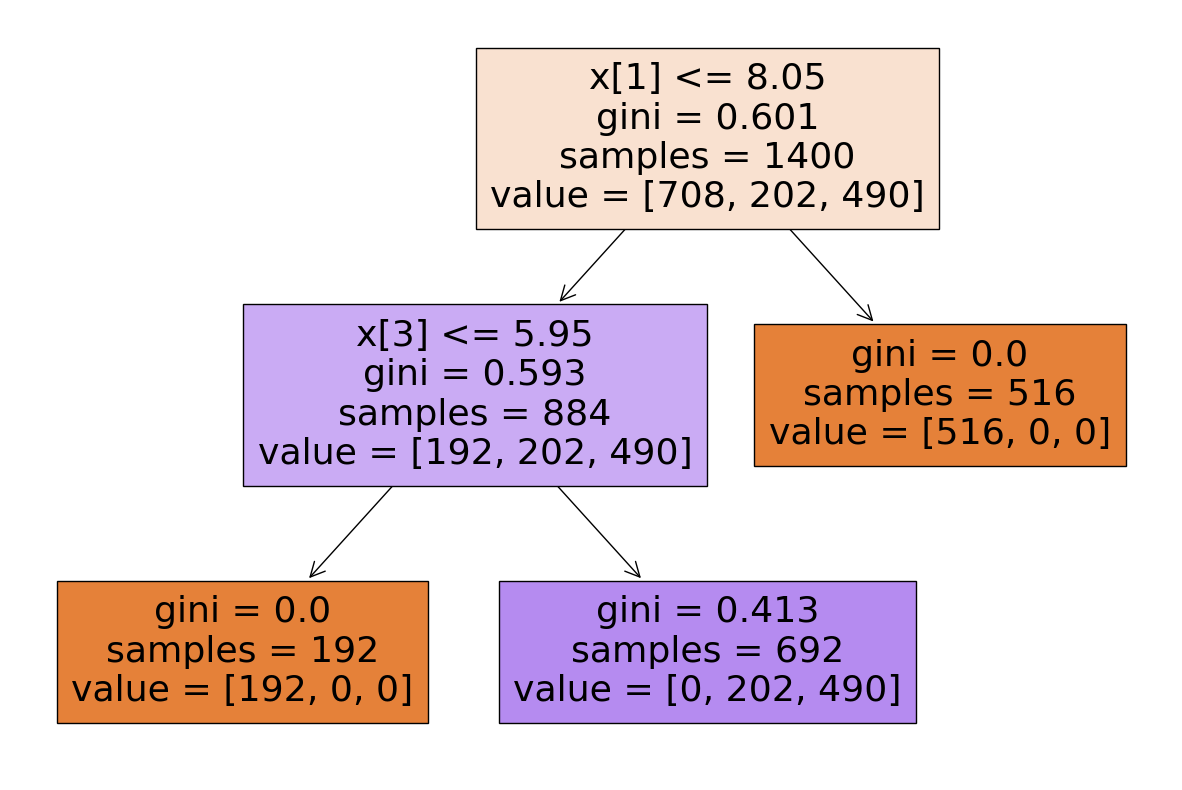

In [23]:
# To visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [24]:
y_pred = treeclassifier.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[321   0   0]
 [  0   0  95]
 [  0   0 184]]
0.8416666666666667
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       321
         Low       0.00      0.00      0.00        95
    Moderate       0.66      1.00      0.79       184

    accuracy                           0.84       600
   macro avg       0.55      0.67      0.60       600
weighted avg       0.74      0.84      0.78       600



C:\Users\Nags\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nags\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nags\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
param={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [27]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
treemodel = DecisionTreeClassifier()

In [30]:
grid = GridSearchCV(treemodel,param_grid=param,cv=5,scoring='accuracy')

In [31]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [32]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [33]:
grid.best_score_

0.9364285714285714

In [34]:
y_pred = grid.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[321   0   0]
 [  0  28  67]
 [  0   0 184]]
0.8883333333333333
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       321
         Low       1.00      0.29      0.46        95
    Moderate       0.73      1.00      0.85       184

    accuracy                           0.89       600
   macro avg       0.91      0.76      0.77       600
weighted avg       0.92      0.89      0.87       600



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Stress_Level"] = labelencoder.fit_transform(df["Stress_Level"])

In [45]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,2
1,2,5.3,3.5,8.0,4.2,3.0,2.75,1
2,3,5.1,3.9,9.2,1.2,4.6,2.67,1
3,4,6.5,2.1,7.2,1.7,6.5,2.88,2
4,5,8.1,0.6,6.5,2.2,6.6,3.51,0
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,2
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,2
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,2
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,0


In [46]:
x = df.drop(["Stress_Level"],axis=1)
y = df["Stress_Level"]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [48]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "XgBoost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') # Calculate Recall
    #model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred,average='weighted') # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred,average='weighted') # Calculate Recall
    #model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    #print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    #print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8100
- F1 score: 0.8104
- Precision: 0.8118
- Recall: 0.8100
----------------------------------
Model performance for Test set
- Accuracy: 0.7983
- F1 score: 0.7983
- Precision: 0.7989
- Recall: 0.7983


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


Gradient Boost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
-